In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
!pip install plotly

In [3]:
dat=np.loadtxt('data/new_total.csv', delimiter=',', skiprows=1)
time_arrive=dat[:,0]
packet_length=dat[:,1]
data_size = time_arrive.shape[0]
print('Data Size:', data_size)

Data Size: 583714


In [4]:
A = time_arrive
L = packet_length # Packet length
C = 450000000 # Link capacity - From step 5
S = L*8/C
D = np.ndarray(shape=(data_size,), dtype=float, order='F') # Depature time
T = np.ndarray(shape=(data_size,), dtype=float, order='F') # Delay Time
D[0] = A[0] + S[0]
T[0] = S[0] #D[0] - A[0]
curr_D_max = D[0];
for i in range(1, data_size):
    D[i] = max(curr_D_max, A[i]) + S[i]
    T[i] = D[i] - A[i]
    curr_D_max = max(curr_D_max, D[i])
print("Departure time:", D)
print("Delay time:", T)

Departure time: [1.70666667e-06 2.78755556e-05 2.96533333e-05 ... 1.15710723e+02
 1.15711665e+02 1.15711667e+02]
Delay time: [1.70666667e-06 2.78755556e-05 2.96533333e-05 ... 1.45120000e-04
 1.33333333e-06 2.73777778e-06]


In [5]:
last_departure_time = D[-1]
col_count = int(last_departure_time*10+4)
print(col_count)
delay_packet_count = np.ndarray(shape=(col_count,), dtype=float, order='F')
delay_packet_count.fill(0)
for i in range(0, data_size):
    A_in = int(A[i]*10)
    D_in = int(D[i]*10)
    delay_packet_count[A_in] += 1
    if(D_in > A_in): delay_packet_count[D_in] += 1
print(delay_packet_count)

1161
[150. 148. 178. ...   0.   0.   0.]


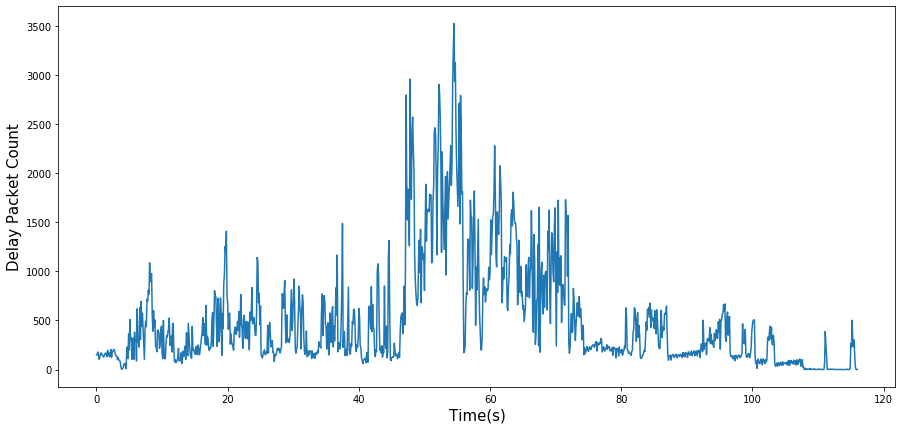

In [6]:
t = np.arange(0, col_count/10,0.1)
plt.figure(figsize=(15,7))
plt.plot(t, delay_packet_count)
plt.xlabel("Time(s)").set_fontsize(15)
plt.ylabel("Delay Packet Count").set_fontsize(15)

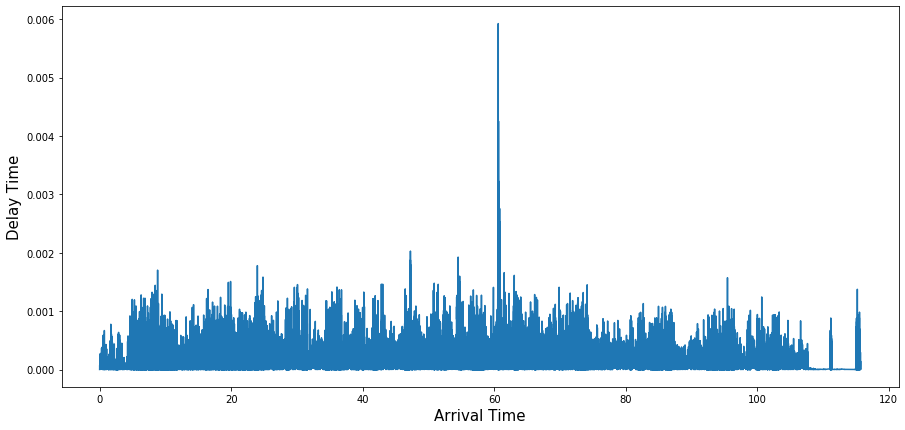

In [7]:
t = np.arange(0, col_count/10,0.1)
plt.figure(figsize=(15,7))
plt.plot(A, T)
plt.xlabel("Arrival Time").set_fontsize(15)
plt.ylabel("Delay Time").set_fontsize(15)